In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
pd.set_option('display.max_columns', None)

In [91]:
df = pd.read_csv('gurgaon_properties_cleaned_v2.csv').drop_duplicates()

In [92]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,breez global hill view,sohna road,0.32,5776.0,554.0,Carpet area: 554 (51.47 sq.m.),2,2,2,19.0,North,Relatively New,NaN,NaN,554.0,0,0,0,0,0,0,21
1,flat,signature global synera,sector 81,0.38,9500.0,400.0,Carpet area: 400 (37.16 sq.m.),1,1,2,3.0,South-West,Relatively New,NaN,NaN,400.0,0,0,0,0,0,1,43
2,flat,emaar mgf emerald floors premier,sector 65,2.35,14242.0,1650.0,Carpet area: 1650 (153.29 sq.m.),3,3,3,3.0,East,Relatively New,NaN,NaN,1650.0,1,1,0,0,0,0,124
3,flat,vatika xpressions,sector 88b,1.10,8148.0,1350.0,Built Up area: 1350 (125.42 sq.m.)Carpet area:...,2,4,3+,2.0,North-East,Under Construction,NaN,1350.0,1050.0,1,0,0,0,0,1,58
4,flat,bptp terra,sector 37d,1.72,7850.0,2191.0,Super Built up area 2191(203.55 sq.m.),3,3,3+,10.0,South-East,Relatively New,2191.0,NaN,NaN,0,1,0,0,0,1,31


In [93]:
df.shape

(3677, 23)

In [94]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

C:\Users\Prabhu\AppData\Local\Temp\ipykernel_16076\2797181776.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])
C:\Users\Prabhu\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot:xlabel='price', ylabel='Density'>

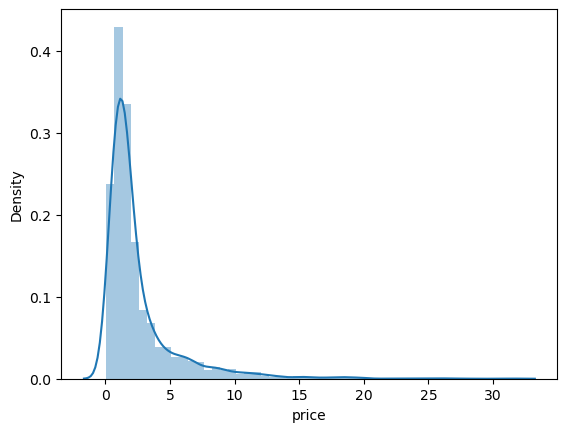

In [95]:
# outliers on the basis of price column
sns.distplot(df['price'])

<AxesSubplot:xlabel='price'>

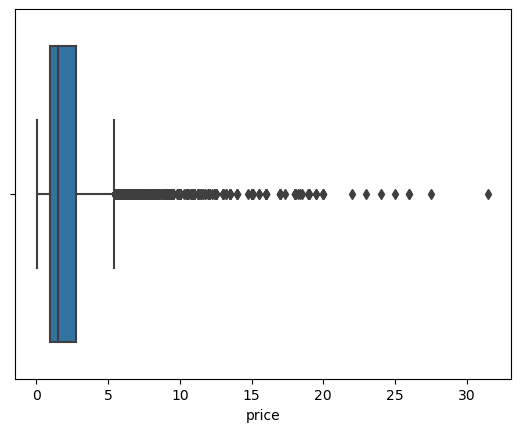

In [96]:
sns.boxplot(x=df['price'])

In [97]:
# Calculate the IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats

(425,
 count    425.000000
 mean       9.235624
 std        4.065259
 min        5.460000
 25%        6.460000
 50%        8.000000
 75%       10.750000
 max       31.500000
 Name: price, dtype: float64)

In [98]:
outliers.sort_values('price',ascending=False).head(20)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1188,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.50,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7,9,3+,3.0,North-East,Moderately Old,NaN,9000.0,NaN,1,1,1,1,0,2,74
1716,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,0,42
3306,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,2.0,North-East,New Property,NaN,4545.0,NaN,1,1,0,1,1,0,138
18,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,2,72
738,house,suncity township,sector 54,25.00,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,North,Moderately Old,NaN,1000.0,NaN,1,1,1,1,0,1,0
9,house,emaar the palm springs,sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,1,0,0,122
207,house,independent,sector 26,23.00,25556.0,9000.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,South-West,Relatively New,NaN,9000.0,NaN,1,1,1,1,0,0,145
879,house,vipul tatvam villa,sector 48,22.00,26667.0,8250.0,Plot area 1000(836.13 sq.m.),5,6,3,3.0,NaN,Moderately Old,NaN,1000.0,NaN,0,1,0,0,0,1,54
437,house,independent,sector 26,20.00,44444.0,4500.0,Plot area 500(418.06 sq.m.),5,7,3+,3.0,West,Relatively New,NaN,4500.0,NaN,0,1,0,1,0,2,97
1780,house,luxury dlf city floors,sector 26,20.00,48889.0,4091.0,Plot area 500(418.06 sq.m.),16,16,3+,4.0,NaN,New Property,NaN,500.0,NaN,0,1,0,0,0,0,31


**on the basis of price col we can say that there are some genuine outliers but there are some data erros as well**

# Price_per_sqft

C:\Users\Prabhu\AppData\Local\Temp\ipykernel_16076\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])
C:\Users\Prabhu\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot:xlabel='price_per_sqft', ylabel='Density'>

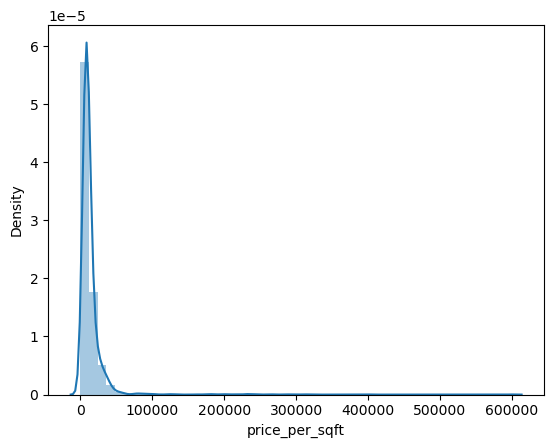

In [99]:
sns.distplot(df['price_per_sqft'])

<AxesSubplot:xlabel='price_per_sqft'>

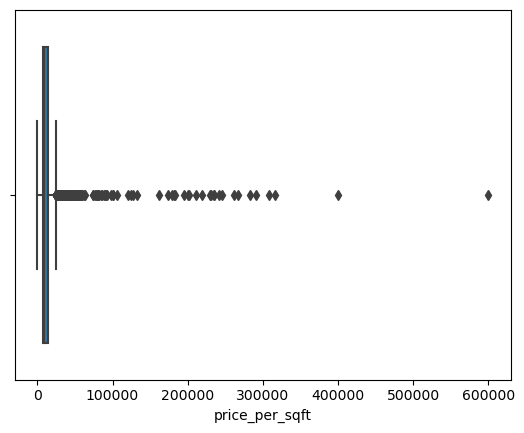

In [100]:
sns.boxplot(x=df['price_per_sqft'])

In [101]:
# Calculate the IQR for the 'price' column
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_sqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['price_per_sqft'].describe()

num_outliers, outliers_sqft_stats

(354,
 count       354.000000
 mean      52592.612994
 std       61150.458507
 min       24489.000000
 25%       28208.250000
 50%       33368.500000
 75%       41982.250000
 max      600000.000000
 Name: price_per_sqft, dtype: float64)

In [102]:
outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)

C:\Users\Prabhu\AppData\Local\Temp\ipykernel_16076\205471443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)


In [103]:
outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])

C:\Users\Prabhu\AppData\Local\Temp\ipykernel_16076\3686006548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])


In [104]:
outliers_sqft['price_per_sqft'].describe()

count      354.000000
mean     29357.906780
std      12403.077309
min       2723.000000
25%      25562.000000
50%      29870.500000
75%      35549.500000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [105]:
df.update(outliers_sqft)

C:\Users\Prabhu\AppData\Local\Temp\ipykernel_16076\4262394064.py:1: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.update(outliers_sqft)
C:\Users\Prabhu\AppData\Local\Temp\ipykernel_16076\4262394064.py:1: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.update(outliers_sqft)
C:\Users\Prabhu\Ap

C:\Users\Prabhu\AppData\Local\Temp\ipykernel_16076\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])
C:\Users\Prabhu\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot:xlabel='price_per_sqft', ylabel='Density'>

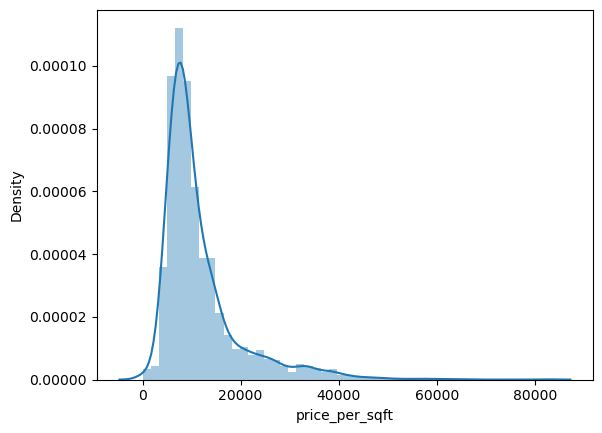

In [106]:
sns.distplot(df['price_per_sqft'])

<AxesSubplot:xlabel='price_per_sqft'>

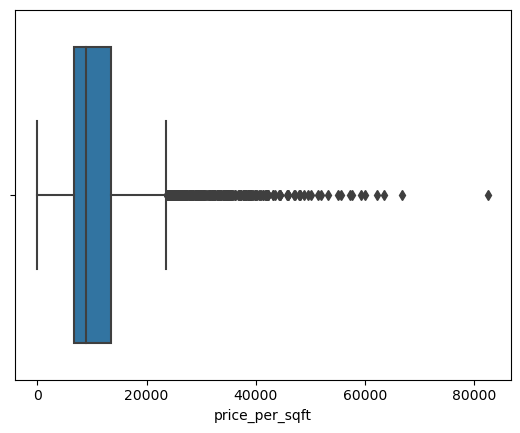

In [107]:
sns.boxplot(x=df['price_per_sqft'])

In [108]:
df[df['price_per_sqft']>50000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
9,house,emaar the palm springs,sector 54,24.00,66667.0,3600.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,1,0,0,122
18,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,2,72
2291,house,malibu towne,sector 47,8.50,53125.0,1600.0,Built Up area: 1600 (148.64 sq.m.),12,12,3+,4.0,North,New Property,NaN,1600.0,NaN,0,0,0,0,0,0,99
2295,house,nul,sector 28,12.50,51440.0,2430.0,Plot area 270(225.75 sq.m.),16,17,3+,4.0,South,Relatively New,NaN,2430.0,NaN,1,1,0,1,1,2,137
2379,house,emaar mgf marbella,sector 66,18.00,55556.0,3240.0,Plot area 360(301.01 sq.m.),4,4,3+,3.0,East,Moderately Old,NaN,3240.0,NaN,1,1,0,1,0,2,75
2552,house,cloudnine cottages,sohna road road,5.50,55000.0,1000.0,Plot area 1000(92.9 sq.m.),3,3,0,1.0,NaN,Moderately Old,NaN,1000.0,NaN,0,0,0,0,0,1,0
2563,house,independent,sector 26,14.75,51864.0,2844.0,Plot area 316(264.22 sq.m.),16,20,3+,4.0,East,New Property,NaN,2844.0,NaN,1,1,1,1,0,0,153
2643,flat,unitech vistas,sector 70,9.00,57508.0,1565.0,Built Up area: 1565 (145.39 sq.m.),3,3,0,7.0,NaN,Undefined,NaN,1565.0,NaN,0,0,0,0,0,1,0
2991,house,independent,sector 25,16.00,59259.0,2700.0,Plot area 350(292.64 sq.m.)Built Up area: 325 ...,16,16,3+,4.0,West,New Property,NaN,325.0,300.0,1,1,1,1,0,2,72
3060,house,project housing board colony,sector 31,8.00,63492.0,1260.0,Built Up area: 140 (117.06 sq.m.),2,1,0,1.0,NaN,Undefined,NaN,140.0,NaN,0,0,0,0,0,1,0


In [109]:
df = df[df['price_per_sqft'] <= 50000]

<AxesSubplot:xlabel='price_per_sqft'>

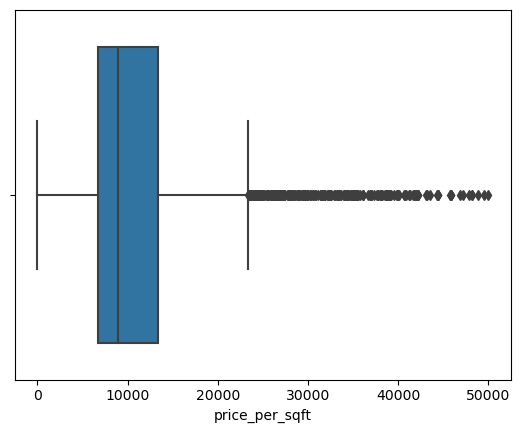

In [110]:
sns.boxplot(x=df['price_per_sqft'])

# Area

C:\Users\Prabhu\AppData\Local\Temp\ipykernel_16076\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])
C:\Users\Prabhu\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot:xlabel='area', ylabel='Density'>

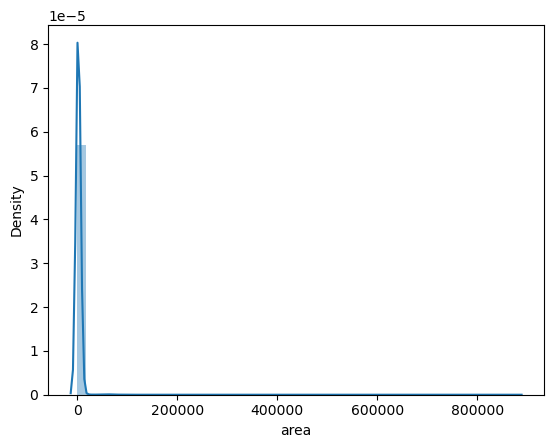

In [111]:
sns.distplot(df['area'])

<AxesSubplot:xlabel='area'>

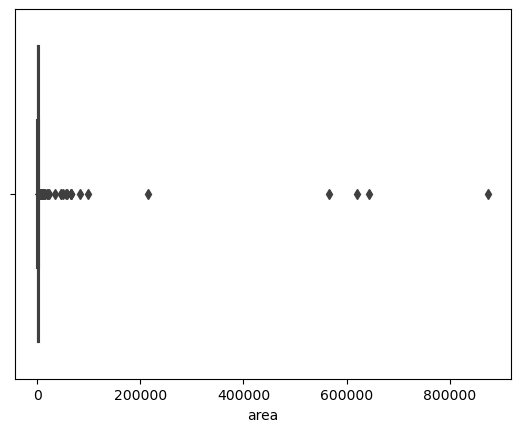

In [112]:
sns.boxplot(x=df['area'])

In [113]:
df['area'].describe()

count      3647.000000
mean       2947.723608
std       23208.194102
min         145.000000
25%        1262.000000
50%        1750.000000
75%        2350.000000
max      875000.000000
Name: area, dtype: float64

In [114]:
df[df['area'] > 100000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
145,house,independent,sector 50,5.00,232.0,215517.0,Plot area 2(1011.71 sq.m.),6,5,3+,2.0,NaN,New Property,NaN,2.0,NaN,1,1,0,1,1,0,0
1051,flat,hcbs sports ville,sohna road,0.35,4.0,875000.0,Built Up area: 737147 (68483.2 sq.m.),2,2,2,8.0,NaN,Relatively New,NaN,737147.0,NaN,0,0,0,0,0,2,44
2982,flat,signature the roselia,sector 95,0.45,7.0,642857.0,Carpet area: 569243 (52884.41 sq.m.),2,2,2,2.0,South-West,New Property,NaN,NaN,569243.0,0,0,0,0,0,1,76
3181,flat,signature global solera 2,sector 107,0.51,9.0,566667.0,Carpet area: 514396 (47788.95 sq.m.),2,2,1,3.0,North,New Property,NaN,NaN,514396.0,0,0,0,0,0,1,44
3531,flat,ramsons kshitij,sector 95,0.31,5.0,620000.0,Carpet area: 607936 (56479.1 sq.m.),2,2,1,1.0,North-East,Relatively New,NaN,NaN,607936.0,1,0,0,0,1,1,65


In [115]:
df = df[df['area'] < 100000]

C:\Users\Prabhu\AppData\Local\Temp\ipykernel_16076\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])
C:\Users\Prabhu\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot:xlabel='area', ylabel='Density'>

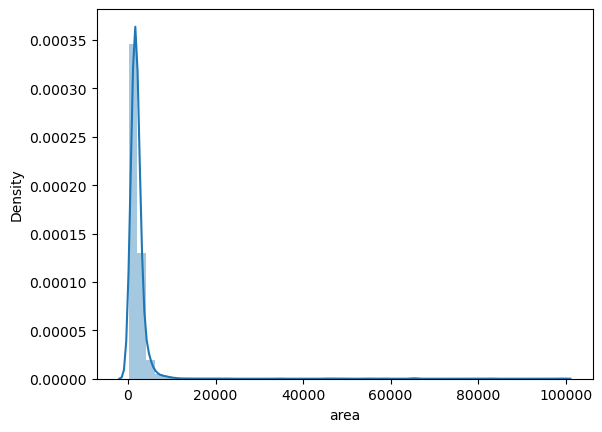

In [116]:
sns.distplot(df['area'])

<AxesSubplot:xlabel='area'>

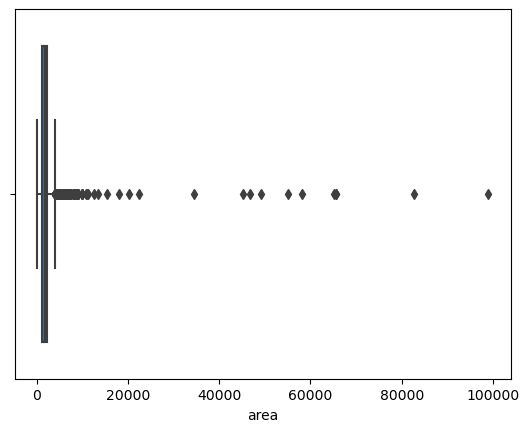

In [117]:
sns.boxplot(x=df['area'])

In [118]:
df[df['area'] > 10000].sort_values('area',ascending=False)

# 1185, 2187, 1199, 3278, 1161, 472, 3377, 2174, 2612

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1185,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,4.0,South,Relatively New,NaN,NaN,11000.00,0,1,1,1,0,0,60
1926,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,1,7
2187,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,10.0,East,New Property,NaN,NaN,64529.00,1,0,0,0,0,1,15
1199,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3,2,1,12.0,North,Relatively New,NaN,NaN,64412.00,0,0,0,0,0,1,51
1221,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,1,0
3278,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,0.0,NaN,Under Construction,NaN,NaN,58141.00,0,0,0,0,0,1,15
1161,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2,2,1,13.0,South-West,Relatively New,NaN,NaN,54917.00,0,0,0,0,0,1,37
472,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,1.0,North-West,Relatively New,NaN,NaN,48811.00,1,0,0,0,0,1,37
1447,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0,1,1,0,0,0,109
3377,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2,2,1,10.0,North-West,Relatively New,NaN,NaN,45966.00,0,0,0,0,1,1,33


In [119]:
df.drop(index=[1185, 2187, 1199, 3278, 1161, 472, 3377, 2174, 2612], inplace=True)

In [120]:
df[df['area'] > 10000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1926,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,1,7
1221,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,1,0
1447,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0,1,1,0,0,0,109
2022,house,independent,sector 57,6.25,2778.0,22498.0,Plot area 3100(2591.99 sq.m.)Built Up area: 26...,9,9,3+,3.0,North-East,New Property,NaN,2660.0,2500.00,0,1,0,0,0,0,61
3161,house,independent,sector 43,5.50,2716.0,20250.0,Plot area 215(179.77 sq.m.)Built Up area: 2850...,8,7,3+,3.0,East,Moderately Old,NaN,2850.0,2250.00,1,1,0,1,1,0,123
2538,flat,godrej air,sector 85,2.50,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,16.0,North-East,Under Construction,NaN,NaN,18122.00,1,0,0,1,1,0,44
2326,house,unitech aspen greens,sector 50,6.95,4490.0,15479.0,Plot area 240(200.67 sq.m.)Built Up area: 2160...,3,3,1,2.0,North-East,Moderately Old,NaN,2160.0,1720.00,0,1,0,0,0,1,160
2242,flat,godrej icon,sector 88a,1.75,1384.0,12645.0,Carpet area: 1175.11,3,3,3+,6.0,NaN,New Property,NaN,NaN,1175.11,0,0,0,0,0,1,55
1716,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,0,42
1949,flat,m3m golfestate,sector 65,13.20,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.00,0,1,0,0,0,1,60


In [121]:
df.loc[1926,'area'] = 115*9
df.loc[1221,'area'] = 7250
df.loc[1447,'area'] = 5800
df.loc[2022,'area'] = 2660
df.loc[3161,'area'] = 2850
df.loc[2538,'area'] = 1812
df.loc[2326,'area'] = 2160
df.loc[2242,'area'] = 1175

C:\Users\Prabhu\AppData\Local\Temp\ipykernel_16076\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])
C:\Users\Prabhu\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot:xlabel='area', ylabel='Density'>

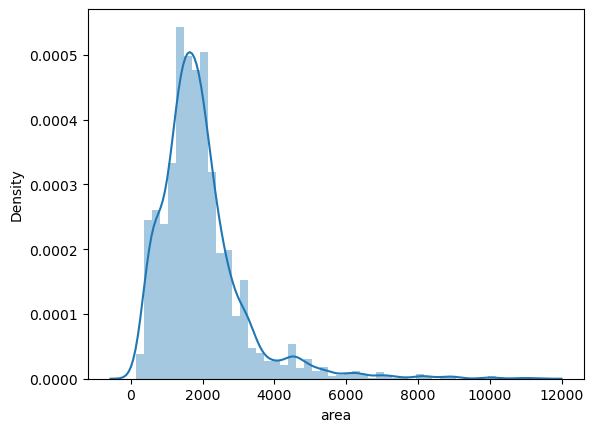

In [122]:
sns.distplot(df['area'])

<AxesSubplot:xlabel='area'>

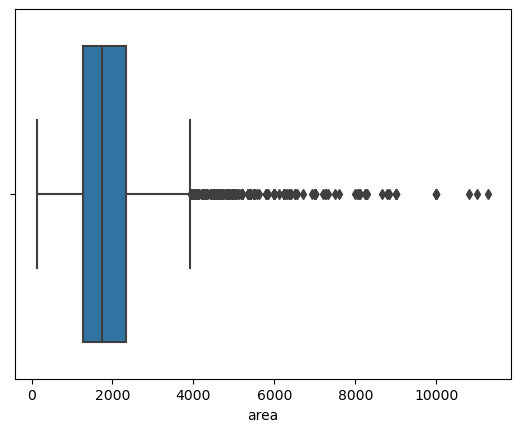

In [123]:
sns.boxplot(x=df['area'])

In [124]:
df['area'].describe()

count     3633.000000
mean      1950.357005
std       1215.707897
min        145.000000
25%       1260.000000
50%       1747.000000
75%       2325.000000
max      11286.000000
Name: area, dtype: float64

# Bedroom

C:\Users\Prabhu\AppData\Local\Temp\ipykernel_16076\1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])
C:\Users\Prabhu\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot:xlabel='bedRoom', ylabel='Density'>

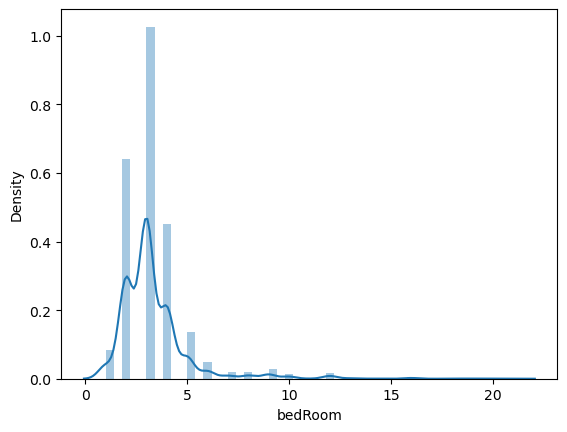

In [125]:
sns.distplot(df['bedRoom'])

<AxesSubplot:xlabel='bedRoom'>

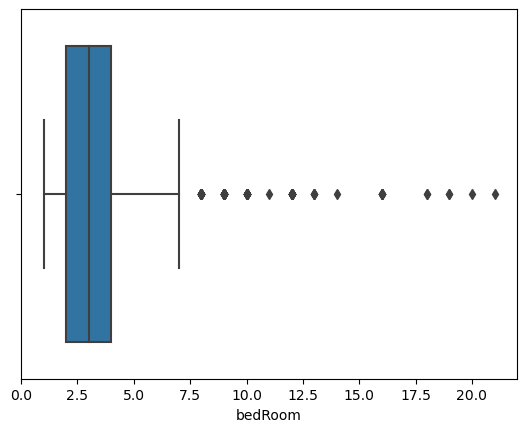

In [126]:
sns.boxplot(x=df['bedRoom'])

In [127]:
df['bedRoom'].describe()

count    3633.000000
mean        3.333609
std         1.830035
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

In [128]:
df[df['bedRoom'] > 10].sort_values('bedRoom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2673,house,independent,sector 54,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21,21,3+,5.0,North,Relatively New,NaN,1161.0,NaN,0,1,0,0,0,2,49
2352,house,independent,sector 43,4.50,39062.0,1152.0,Plot area 128(107.02 sq.m.),20,20,3+,4.0,East,Relatively New,NaN,1152.0,NaN,0,1,0,0,0,2,22
1555,house,independent,sector 17a,3.93,24214.0,1623.0,Plot area 1623(150.78 sq.m.)Built Up area: 162...,19,17,3,4.0,North-West,Relatively New,NaN,1622.0,NaN,1,1,1,1,0,1,74
1124,house,independent,sector 17a,3.87,5160.0,7500.0,Plot area 1623(150.78 sq.m.)Built Up area: 750...,19,17,3+,5.0,North-West,Relatively New,NaN,7500.0,NaN,1,0,1,0,0,1,68
2640,house,independent,sector 54,5.50,38194.0,1440.0,Plot area 160(133.78 sq.m.),18,18,3+,4.0,South-West,Relatively New,NaN,1440.0,NaN,0,1,0,0,0,2,70
2260,house,private house,sector 55,7.05,46906.0,1503.0,Plot area 167(139.63 sq.m.),18,18,3+,4.0,North-East,Relatively New,NaN,1503.0,NaN,0,0,0,0,1,2,57
1204,house,independent,sector 55,9.19,34037.0,2700.0,Plot area 300(250.84 sq.m.),16,18,2,4.0,West,New Property,NaN,2700.0,NaN,0,1,0,1,0,0,49
3268,house,independent,sector 43,13.50,50000.0,2700.0,Plot area 300(250.84 sq.m.),16,16,3+,4.0,North-West,Relatively New,NaN,2700.0,NaN,1,1,0,1,1,1,41
1944,house,independent,sector 11,4.50,25000.0,1800.0,Plot area 200(167.23 sq.m.),16,16,3+,4.0,South,Relatively New,NaN,1800.0,NaN,0,0,0,0,0,0,20
2546,house,independent,sector 56,12.39,45889.0,2700.0,Plot area 300(250.84 sq.m.),16,18,3+,4.0,North-East,New Property,NaN,2700.0,NaN,0,1,0,1,0,0,49


In [129]:
df = df[df['bedRoom'] <= 10]

In [130]:
df.shape

(3588, 23)

C:\Users\Prabhu\AppData\Local\Temp\ipykernel_16076\1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])
C:\Users\Prabhu\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot:xlabel='bedRoom', ylabel='Density'>

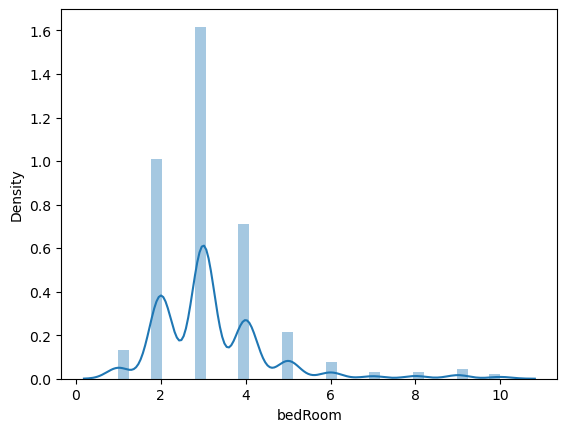

In [131]:
sns.distplot(df['bedRoom'])

<AxesSubplot:xlabel='bedRoom'>

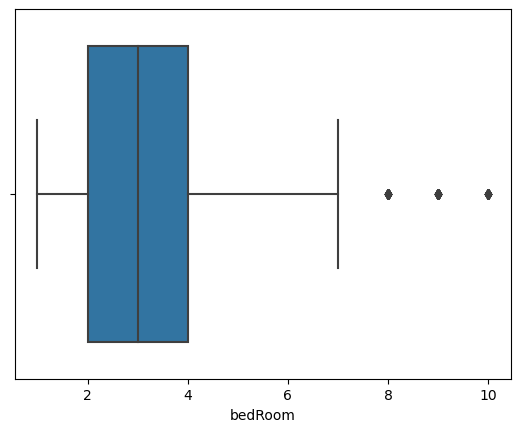

In [132]:
sns.boxplot(x=df['bedRoom'])

In [133]:
df['bedRoom'].describe()

count    3588.000000
mean        3.203735
std         1.393968
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: bedRoom, dtype: float64

# Bathroom

C:\Users\Prabhu\AppData\Local\Temp\ipykernel_16076\2904465235.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bathroom'])
C:\Users\Prabhu\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot:xlabel='bathroom', ylabel='Density'>

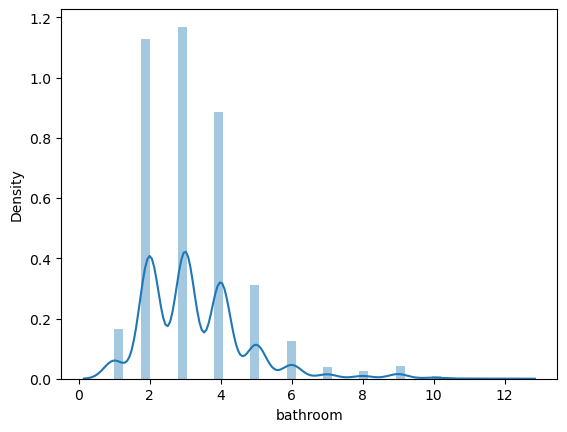

In [134]:
sns.distplot(df['bathroom'])

<AxesSubplot:xlabel='bathroom'>

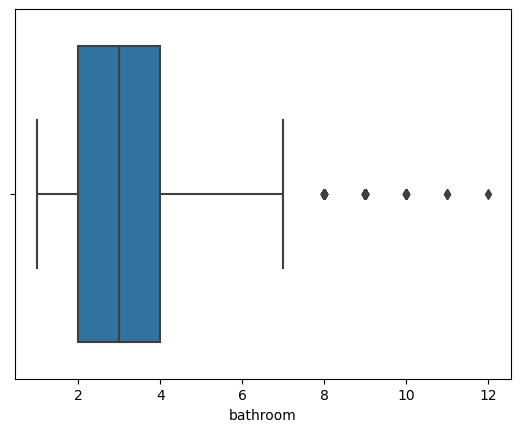

In [135]:
sns.boxplot(x=df['bathroom'])

In [136]:
df[df['bathroom'] > 10].sort_values('bathroom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1383,house,adani brahma samsara,sector 60,18.02,28200.0,6390.0,Built Up area: 6390 (593.65 sq.m.),9,12,3+,3.0,North-East,Relatively New,NaN,6390.0,NaN,0,1,0,0,0,0,146
2154,house,independent,sector 24,11.00,28902.0,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8,11,3+,3.0,East,Old Property,NaN,5000.0,NaN,1,1,0,1,1,0,39
2383,house,independent,sector 39,7.00,10000.0,7000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,10,11,3+,4.0,South-East,Relatively New,NaN,7000.0,NaN,0,0,0,1,0,2,38


In [137]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,breez global hill view,sohna road,0.32,5776.0,554.0,Carpet area: 554 (51.47 sq.m.),2,2,2,19.0,North,Relatively New,NaN,NaN,554.0,0,0,0,0,0,0,21
1,flat,signature global synera,sector 81,0.38,9500.0,400.0,Carpet area: 400 (37.16 sq.m.),1,1,2,3.0,South-West,Relatively New,NaN,NaN,400.0,0,0,0,0,0,1,43
2,flat,emaar mgf emerald floors premier,sector 65,2.35,14242.0,1650.0,Carpet area: 1650 (153.29 sq.m.),3,3,3,3.0,East,Relatively New,NaN,NaN,1650.0,1,1,0,0,0,0,124
3,flat,vatika xpressions,sector 88b,1.10,8148.0,1350.0,Built Up area: 1350 (125.42 sq.m.)Carpet area:...,2,4,3+,2.0,North-East,Under Construction,NaN,1350.0,1050.0,1,0,0,0,0,1,58
4,flat,bptp terra,sector 37d,1.72,7850.0,2191.0,Super Built up area 2191(203.55 sq.m.),3,3,3+,10.0,South-East,Relatively New,2191.0,NaN,NaN,0,1,0,0,0,1,31


# super built up area

C:\Users\Prabhu\AppData\Local\Temp\ipykernel_16076\4184943455.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['super_built_up_area'])
C:\Users\Prabhu\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot:xlabel='super_built_up_area', ylabel='Density'>

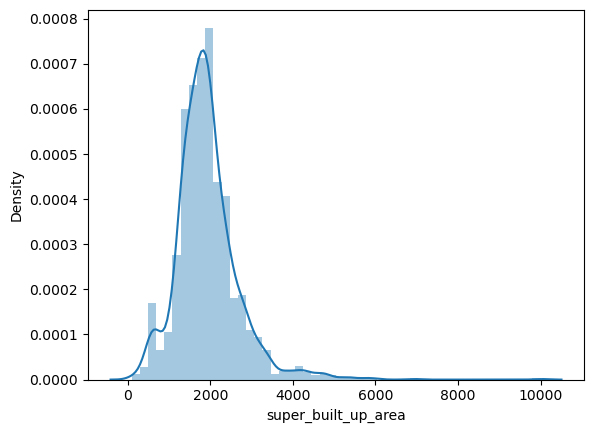

In [138]:
sns.distplot(df['super_built_up_area'])

<AxesSubplot:xlabel='super_built_up_area'>

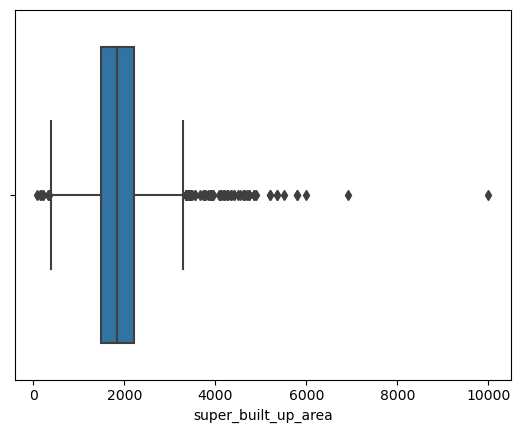

In [139]:
sns.boxplot(x=df['super_built_up_area'])

In [140]:
df['super_built_up_area'].describe()

count     1875.000000
mean      1925.237627
std        764.172177
min         89.000000
25%       1479.500000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

In [141]:
df[df['super_built_up_area'] > 6000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1763,flat,bestech park view grand spa,sector 81,4.7,6786.0,6926.0,Super Built up area 6926(643.45 sq.m.),4,4,3+,19.0,North,Relatively New,6926.0,NaN,NaN,0,1,0,0,0,0,140
1846,flat,krrish provence estate,gwal pahari,7.5,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5,6,3+,23.0,North-East,Relatively New,10000.0,NaN,NaN,0,1,0,1,1,1,49


# built up area

C:\Users\Prabhu\AppData\Local\Temp\ipykernel_16076\3494228458.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['built_up_area'])
C:\Users\Prabhu\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot:xlabel='built_up_area', ylabel='Density'>

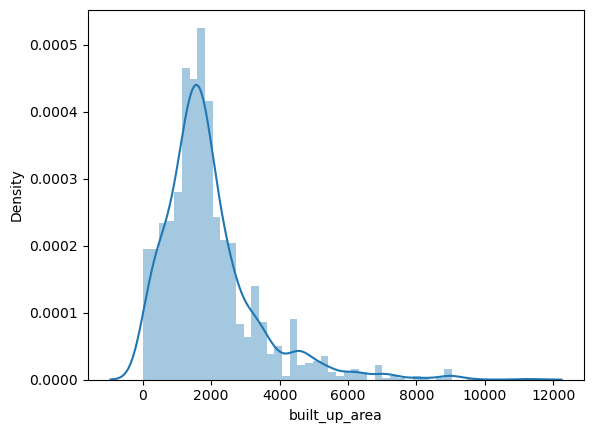

In [142]:
sns.distplot(df['built_up_area'])

<AxesSubplot:xlabel='built_up_area'>

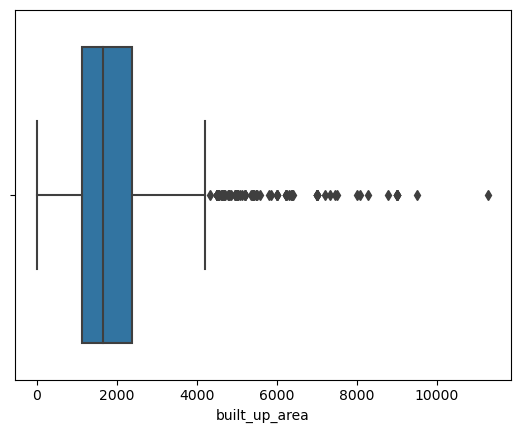

In [143]:
sns.boxplot(x=df['built_up_area'])

In [144]:
df[df['built_up_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1716,house,independent,sector 43,27.5,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,0,42


# carpet area

C:\Users\Prabhu\AppData\Local\Temp\ipykernel_16076\3905767603.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carpet_area'])
C:\Users\Prabhu\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot:xlabel='carpet_area', ylabel='Density'>

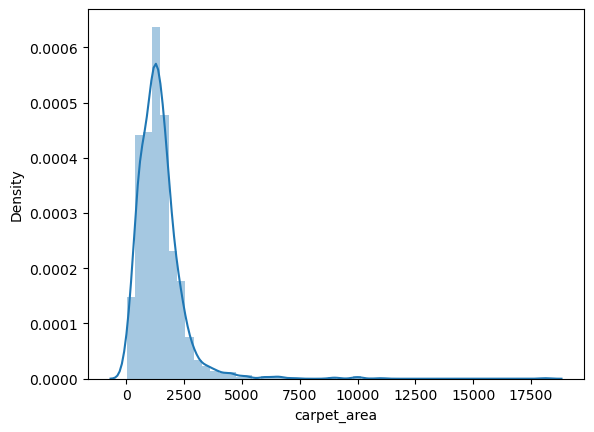

In [145]:
sns.distplot(df['carpet_area'])

<AxesSubplot:xlabel='carpet_area'>

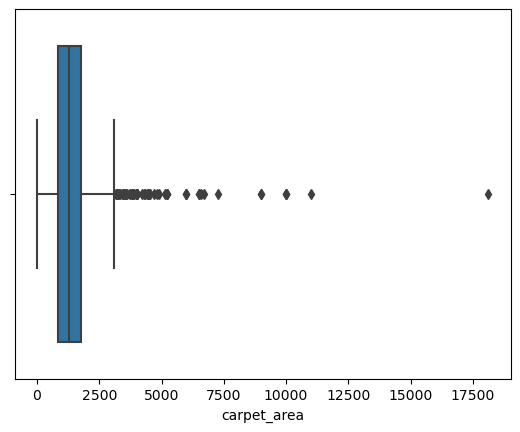

In [146]:
sns.boxplot(x=df['carpet_area'])

In [147]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1949,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0,1,0,0,0,1,60
2538,flat,godrej air,sector 85,2.5,1379.0,1812.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,16.0,North-East,Under Construction,NaN,NaN,18122.0,1,0,0,1,1,0,44


In [148]:
df.loc[2538,'carpet_area'] = 1812

In [149]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1949,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0,1,0,0,0,1,60


In [150]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,breez global hill view,sohna road,0.32,5776.0,554.0,Carpet area: 554 (51.47 sq.m.),2,2,2,19.0,North,Relatively New,NaN,NaN,554.0,0,0,0,0,0,0,21
1,flat,signature global synera,sector 81,0.38,9500.0,400.0,Carpet area: 400 (37.16 sq.m.),1,1,2,3.0,South-West,Relatively New,NaN,NaN,400.0,0,0,0,0,0,1,43
2,flat,emaar mgf emerald floors premier,sector 65,2.35,14242.0,1650.0,Carpet area: 1650 (153.29 sq.m.),3,3,3,3.0,East,Relatively New,NaN,NaN,1650.0,1,1,0,0,0,0,124
3,flat,vatika xpressions,sector 88b,1.10,8148.0,1350.0,Built Up area: 1350 (125.42 sq.m.)Carpet area:...,2,4,3+,2.0,North-East,Under Construction,NaN,1350.0,1050.0,1,0,0,0,0,1,58
4,flat,bptp terra,sector 37d,1.72,7850.0,2191.0,Super Built up area 2191(203.55 sq.m.),3,3,3+,10.0,South-East,Relatively New,2191.0,NaN,NaN,0,1,0,0,0,1,31


C:\Users\Prabhu\AppData\Local\Temp\ipykernel_16076\3385064764.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['luxury_score'])
C:\Users\Prabhu\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot:xlabel='luxury_score', ylabel='Density'>

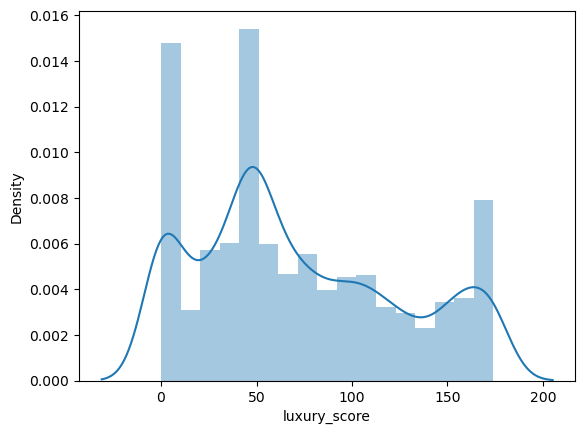

In [151]:
sns.distplot(df['luxury_score'])

<AxesSubplot:>

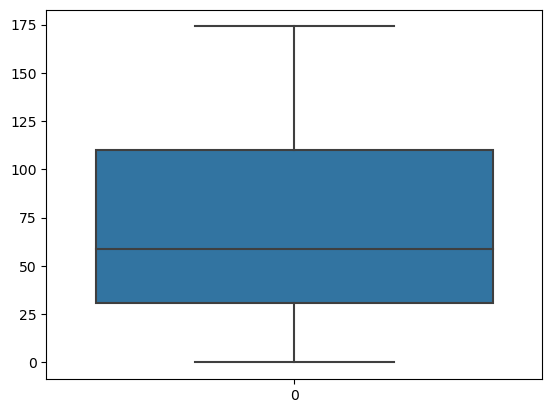

In [152]:
sns.boxplot(df['luxury_score'])

In [153]:
df.shape

(3588, 23)

C:\Users\Prabhu\AppData\Local\Temp\ipykernel_16076\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])
C:\Users\Prabhu\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot:xlabel='price_per_sqft', ylabel='Density'>

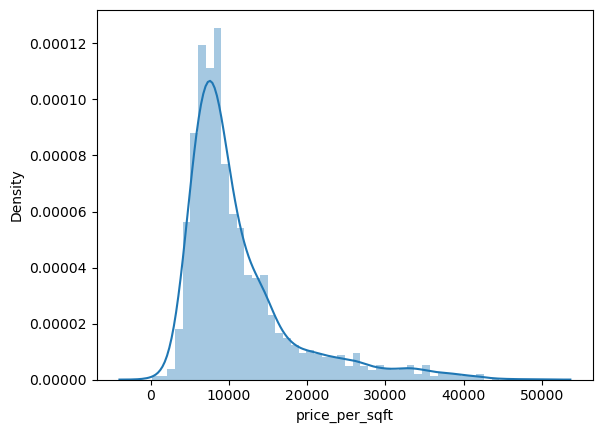

In [156]:
sns.distplot(df['price_per_sqft'])

In [157]:
df['price_per_sqft'] = round((df['price']*10000000)/df['area'])

In [158]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,breez global hill view,sohna road,0.32,5776.0,554.0,Carpet area: 554 (51.47 sq.m.),2,2,2,19.0,North,Relatively New,NaN,NaN,554.0,0,0,0,0,0,0,21
1,flat,signature global synera,sector 81,0.38,9500.0,400.0,Carpet area: 400 (37.16 sq.m.),1,1,2,3.0,South-West,Relatively New,NaN,NaN,400.0,0,0,0,0,0,1,43
2,flat,emaar mgf emerald floors premier,sector 65,2.35,14242.0,1650.0,Carpet area: 1650 (153.29 sq.m.),3,3,3,3.0,East,Relatively New,NaN,NaN,1650.0,1,1,0,0,0,0,124
3,flat,vatika xpressions,sector 88b,1.10,8148.0,1350.0,Built Up area: 1350 (125.42 sq.m.)Carpet area:...,2,4,3+,2.0,North-East,Under Construction,NaN,1350.0,1050.0,1,0,0,0,0,1,58
4,flat,bptp terra,sector 37d,1.72,7850.0,2191.0,Super Built up area 2191(203.55 sq.m.),3,3,3+,10.0,South-East,Relatively New,2191.0,NaN,NaN,0,1,0,0,0,1,31


C:\Users\Prabhu\AppData\Local\Temp\ipykernel_16076\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])
C:\Users\Prabhu\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot:xlabel='price_per_sqft', ylabel='Density'>

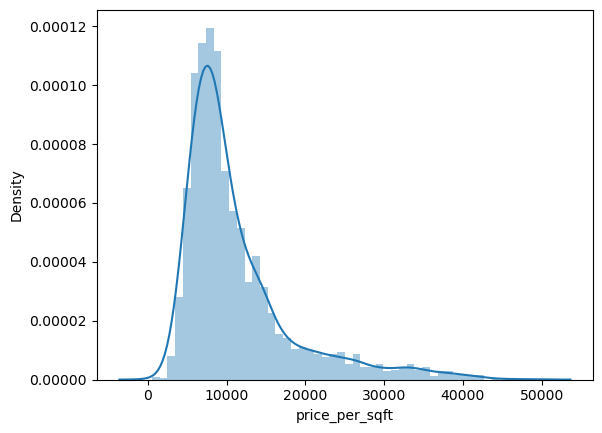

In [159]:
sns.distplot(df['price_per_sqft'])

<AxesSubplot:>

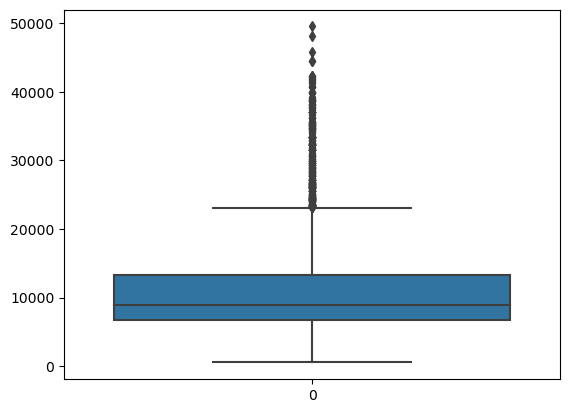

In [160]:
sns.boxplot(df['price_per_sqft'])

In [161]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,breez global hill view,sohna road,0.32,5776.0,554.0,Carpet area: 554 (51.47 sq.m.),2,2,2,19.0,North,Relatively New,NaN,NaN,554.0,0,0,0,0,0,0,21
1,flat,signature global synera,sector 81,0.38,9500.0,400.0,Carpet area: 400 (37.16 sq.m.),1,1,2,3.0,South-West,Relatively New,NaN,NaN,400.0,0,0,0,0,0,1,43
2,flat,emaar mgf emerald floors premier,sector 65,2.35,14242.0,1650.0,Carpet area: 1650 (153.29 sq.m.),3,3,3,3.0,East,Relatively New,NaN,NaN,1650.0,1,1,0,0,0,0,124
3,flat,vatika xpressions,sector 88b,1.10,8148.0,1350.0,Built Up area: 1350 (125.42 sq.m.)Carpet area:...,2,4,3+,2.0,North-East,Under Construction,NaN,1350.0,1050.0,1,0,0,0,0,1,58
4,flat,bptp terra,sector 37d,1.72,7850.0,2191.0,Super Built up area 2191(203.55 sq.m.),3,3,3+,10.0,South-East,Relatively New,2191.0,NaN,NaN,0,1,0,0,0,1,31


In [163]:
x = df[df['price_per_sqft'] <= 20000]


In [167]:
(x['area']/x['bedRoom']).quantile(0.05)

250.5

In [168]:
df[(df['area']/df['bedRoom'])<250].sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1807,house,independent,sector 17,3.50,24306.0,1440.0,Built Up area: 160 (14.86 sq.m.),6,6,3+,3.0,North-West,Undefined,NaN,160.0,NaN,0,0,0,0,0,1,0
1455,flat,mvn athens,sohna road,0.26,5394.0,482.0,Carpet area: 481.74 (44.76 sq.m.),2,2,1,2.0,NaN,Relatively New,NaN,NaN,481.792164,0,0,0,0,0,1,37
1526,house,independent,sector 2,3.65,23443.0,1557.0,Plot area 173(144.65 sq.m.),9,9,3+,3.0,West,New Property,NaN,1557.0,NaN,0,1,0,1,0,0,116
1958,house,independent,sector 6,0.50,8333.0,600.0,Plot area 600(55.74 sq.m.),3,3,2,2.0,East,Moderately Old,NaN,600.0,NaN,0,0,0,1,0,1,0
614,flat,mvn athens,sohna road,0.25,5187.0,482.0,Carpet area: 481.73 (44.75 sq.m.),2,2,1,0.0,North,Relatively New,NaN,NaN,481.684525,0,0,0,1,0,1,90


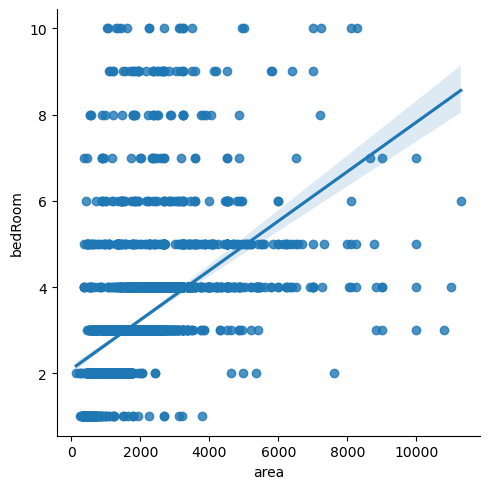

In [169]:
sns.lmplot(data=df,x='area',y='bedRoom')

In [170]:
df['area_room_ratio'] = df['area']/df['bedRoom']

In [171]:
(df[df['area_room_ratio'] < 250])['bedRoom'].value_counts()

bedRoom
2     47
3     33
5     28
6     17
4     17
9     15
8     12
7      8
10     8
Name: count, dtype: int64

In [172]:
df = df[df['area_room_ratio'] > 100]

In [174]:
outliers_df = df[(df['area_room_ratio'] < 250) & (df['bedRoom'] > 3)]

In [175]:
outliers_df['bedRoom'] = round(outliers_df['bedRoom']/outliers_df['floorNum'])

C:\Users\Prabhu\AppData\Local\Temp\ipykernel_16076\3450078040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df['bedRoom'] = round(outliers_df['bedRoom']/outliers_df['floorNum'])


In [176]:
df.update(outliers_df)

C:\Users\Prabhu\AppData\Local\Temp\ipykernel_16076\3159295313.py:1: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.update(outliers_df)
C:\Users\Prabhu\AppData\Local\Temp\ipykernel_16076\3159295313.py:1: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.update(outliers_df)
C:\Users\Prabhu\AppDat

In [177]:
df['area_room_ratio'] = df['area']/df['bedRoom']

C:\Users\Prabhu\AppData\Local\Temp\ipykernel_16076\465686754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['area_room_ratio'] = df['area']/df['bedRoom']


In [178]:
df[(df['area_room_ratio'] < 250) & (df['bedRoom'] > 4)]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
143,house,independent,sector 105,1.10,12222.0,900.0,Carpet area: 900 (83.61 sq.m.),6,4,1,1.0,South-West,Undefined,NaN,NaN,900.0,0,0,0,0,0,1,0,150.000000
255,house,independent,sector 2,0.98,9074.0,1080.0,Carpet area: 120 (100.34 sq.m.),9,4,3,1.0,South,Undefined,NaN,NaN,120.0,0,0,0,0,0,1,0,120.000000
774,house,independent,sector 12,2.50,13889.0,1800.0,Plot area 1800(167.23 sq.m.),9,5,2,1.0,South-East,Old Property,NaN,1800.0,NaN,0,0,0,1,0,1,8,200.000000
882,house,independent,sector 12,0.65,6500.0,1000.0,Carpet area: 1000 (92.9 sq.m.),6,2,3,1.0,NaN,Undefined,NaN,NaN,1000.0,0,0,0,0,0,1,0,166.666667
955,house,"bhim nagar, sector 6",sector 6,0.85,14096.0,603.0,Plot area 67(6.22 sq.m.),5,2,2,1.0,NaN,Old Property,NaN,67.0,NaN,0,0,0,1,0,1,29,120.600000
1261,house,independent,sector 11,3.50,15556.0,2250.0,Built Up area: 2250 (209.03 sq.m.),10,1,0,1.0,NaN,New Property,NaN,2250.0,NaN,0,0,0,0,0,1,0,225.000000
1380,house,shivpuri,sector 7,2.80,12444.0,2250.0,Plot area 2250(209.03 sq.m.),10,7,3,1.0,NaN,Old Property,NaN,2250.0,NaN,1,1,0,1,1,0,0,225.000000
1745,house,independent,manesar,0.80,6667.0,1200.0,Plot area 1200(111.48 sq.m.),8,8,2,1.0,NaN,Relatively New,NaN,1200.0,NaN,0,0,0,0,0,1,0,150.000000
1860,house,independent,sector 7,1.16,11717.0,990.0,Carpet area: 110 (91.97 sq.m.),5,4,2,1.0,North-East,Undefined,NaN,NaN,110.0,0,0,0,0,0,1,0,198.000000
2437,house,independent,sector 17,0.32,5664.0,565.0,Built Up area: 565 (52.49 sq.m.),5,1,0,1.0,NaN,Undefined,NaN,565.0,NaN,0,0,0,0,0,1,0,113.000000


In [179]:
df[(df['area_room_ratio'] < 250) & (df['bedRoom'] > 4)].shape

(13, 24)

In [180]:
df.shape

(3568, 24)

In [182]:
df = df[~((df['area_room_ratio'] < 250) & (df['bedRoom'] > 4))] 

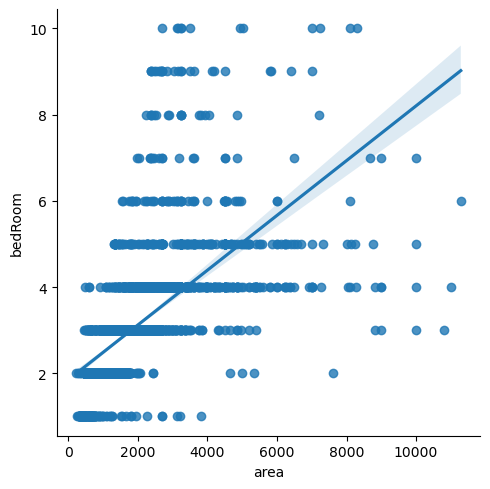

In [183]:
sns.lmplot(data=df,x='area',y='bedRoom')

In [184]:
df.shape

(3555, 24)

In [185]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,breez global hill view,sohna road,0.32,5776.0,554.0,Carpet area: 554 (51.47 sq.m.),2,2,2,19.0,North,Relatively New,NaN,NaN,554.0,0,0,0,0,0,0,21,277.000000
1,flat,signature global synera,sector 81,0.38,9500.0,400.0,Carpet area: 400 (37.16 sq.m.),1,1,2,3.0,South-West,Relatively New,NaN,NaN,400.0,0,0,0,0,0,1,43,400.000000
2,flat,emaar mgf emerald floors premier,sector 65,2.35,14242.0,1650.0,Carpet area: 1650 (153.29 sq.m.),3,3,3,3.0,East,Relatively New,NaN,NaN,1650.0,1,1,0,0,0,0,124,550.000000
3,flat,vatika xpressions,sector 88b,1.10,8148.0,1350.0,Built Up area: 1350 (125.42 sq.m.)Carpet area:...,2,4,3+,2.0,North-East,Under Construction,NaN,1350.0,1050.0,1,0,0,0,0,1,58,675.000000
4,flat,bptp terra,sector 37d,1.72,7850.0,2191.0,Super Built up area 2191(203.55 sq.m.),3,3,3+,10.0,South-East,Relatively New,2191.0,NaN,NaN,0,1,0,0,0,1,31,730.333333


In [186]:
df.to_csv('gurgaon_properties_outlier_treated.csv',index=False)

# Missing Value Imputation

In [187]:
df = pd.read_csv('gurgaon_properties_outlier_treated.csv')

In [188]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,breez global hill view,sohna road,0.32,5776.0,554.0,Carpet area: 554 (51.47 sq.m.),2,2,2,19.0,North,Relatively New,NaN,NaN,554.0,0,0,0,0,0,0,21,277.000000
1,flat,signature global synera,sector 81,0.38,9500.0,400.0,Carpet area: 400 (37.16 sq.m.),1,1,2,3.0,South-West,Relatively New,NaN,NaN,400.0,0,0,0,0,0,1,43,400.000000
2,flat,emaar mgf emerald floors premier,sector 65,2.35,14242.0,1650.0,Carpet area: 1650 (153.29 sq.m.),3,3,3,3.0,East,Relatively New,NaN,NaN,1650.0,1,1,0,0,0,0,124,550.000000
3,flat,vatika xpressions,sector 88b,1.10,8148.0,1350.0,Built Up area: 1350 (125.42 sq.m.)Carpet area:...,2,4,3+,2.0,North-East,Under Construction,NaN,1350.0,1050.0,1,0,0,0,0,1,58,675.000000
4,flat,bptp terra,sector 37d,1.72,7850.0,2191.0,Super Built up area 2191(203.55 sq.m.),3,3,3+,10.0,South-East,Relatively New,2191.0,NaN,NaN,0,1,0,0,0,1,31,730.333333


In [189]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area          1968
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

# Built up area

<AxesSubplot:xlabel='built_up_area', ylabel='super_built_up_area'>

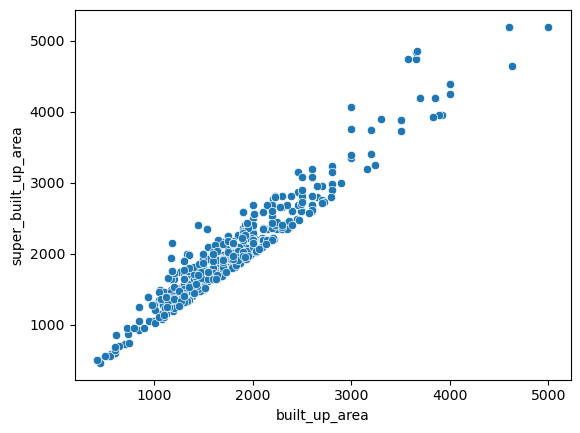

In [191]:
sns.scatterplot(data=df,x='built_up_area',y='super_built_up_area')

<AxesSubplot:xlabel='built_up_area', ylabel='carpet_area'>

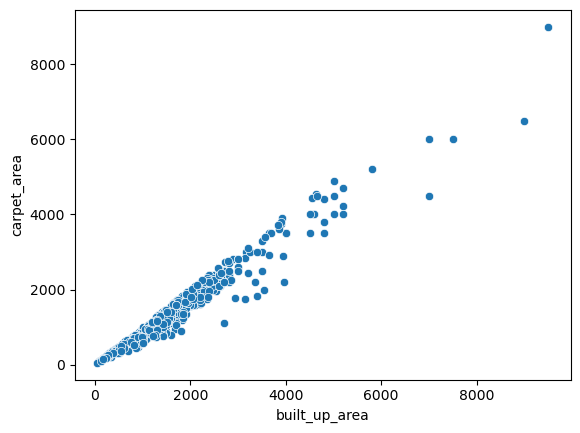

In [192]:
sns.scatterplot(data=df,x='built_up_area',y='carpet_area')

In [193]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))

0       False
1       False
2       False
3       False
4       False
        ...  
3550    False
3551    False
3552    False
3553    False
3554    False
Length: 3555, dtype: bool

In [194]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [195]:
all_present_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
24,flat,ss the leaf,sector 85,2.00,8306.0,2408.0,Super Built up area 2408(223.71 sq.m.)Built Up...,3,4,3,6.0,North,Relatively New,2408.0,2300.0,2200.0,0,1,0,0,0,1,49,802.666667
29,flat,suncity platinum towers,sector 28,6.20,23091.0,2685.0,Super Built up area 2685(249.44 sq.m.)Built Up...,3,4,3+,21.0,South,Relatively New,2685.0,2000.0,1900.0,0,1,0,0,0,0,160,895.000000
31,flat,paras dews,sector 106,1.28,7273.0,1760.0,Super Built up area 1760(163.51 sq.m.)Built Up...,3,4,3+,24.0,North-West,Relatively New,1760.0,1186.0,1130.0,0,1,0,0,0,1,49,586.666667
35,flat,shree vardhman flora,sector 90,0.65,6792.0,957.0,Super Built up area 1350(125.42 sq.m.)Built Up...,2,2,3,9.0,South-East,Relatively New,1350.0,1050.0,950.0,1,0,0,0,0,1,67,478.500000
45,flat,ireo victory valley,sector 67,2.99,11832.0,2527.0,Super Built up area 2527(234.77 sq.m.)Built Up...,3,3,3,4.0,East,Relatively New,2527.0,2200.0,2100.0,0,1,0,0,0,0,37,842.333333


In [196]:
all_present_df.shape

(531, 24)

In [197]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [198]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [199]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.105263157894737 0.9


In [200]:
# both present built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [201]:
sbc_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
6,flat,pareena coban residences,sector 99a,1.32,6610.0,1997.0,Super Built up area 1997(185.53 sq.m.)Carpet a...,3,5,3,11.0,North-East,New Property,1997.0,NaN,1500.0,0,1,0,0,0,1,88,665.666667
11,flat,ansal estella,sector 103,1.50,8671.0,1730.0,Super Built up area 1730(160.72 sq.m.)Carpet a...,3,3,3+,6.0,NaN,Under Construction,1730.0,NaN,1725.0,0,0,0,0,0,1,58,576.666667
16,flat,indiabulls centrum park,sector 103,1.65,8250.0,2000.0,Super Built up area 2000(185.81 sq.m.)Carpet a...,3,3,3+,15.0,NaN,Relatively New,2000.0,NaN,1400.0,1,0,0,0,0,1,38,666.666667
20,flat,satya the hermitage,sector 103,0.89,6138.0,1450.0,Super Built up area 1450(134.71 sq.m.)Carpet a...,2,3,3,1.0,NaN,Relatively New,1450.0,NaN,1081.0,0,1,0,0,0,1,75,725.000000
23,flat,dlf the ultima,sector 81,2.30,14603.0,1575.0,Super Built up area 2100(195.1 sq.m.)Carpet ar...,3,4,3+,27.0,East,Relatively New,2100.0,NaN,1575.0,0,1,0,0,0,0,119,525.000000


In [202]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

C:\Users\Prabhu\AppData\Local\Temp\ipykernel_16076\1215074969.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)
C:\Users\Prabhu\AppData\Local\Temp\ipykernel_16076\1215074969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

In [203]:
df.update(sbc_df)

C:\Users\Prabhu\AppData\Local\Temp\ipykernel_16076\3129191992.py:1: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.update(sbc_df)
C:\Users\Prabhu\AppData\Local\Temp\ipykernel_16076\3129191992.py:1: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.update(sbc_df)
C:\Users\Prabhu\AppData\Local\Te

In [204]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area          1547
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [205]:
# sb present c is null built up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [206]:
sb_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
4,flat,bptp terra,sector 37d,1.72,7850.0,2191.0,Super Built up area 2191(203.55 sq.m.),3,3,3+,10.0,South-East,Relatively New,2191.0,NaN,NaN,0,1,0,0,0,1,31,730.333333
8,flat,dlf the ultima,sector 81,3.25,11805.0,2753.0,Super Built up area 2753(255.76 sq.m.),4,4,3+,11.0,North-West,Moderately Old,2753.0,NaN,NaN,0,1,0,0,0,1,28,688.250000
12,flat,godrej summit,sector 104,1.25,6779.0,1844.0,Super Built up area 1844(171.31 sq.m.),3,4,3+,12.0,East,Relatively New,1844.0,NaN,NaN,0,1,0,0,1,1,79,614.666667
13,flat,dlf regal gardens,sector 90,1.80,7223.0,2492.0,Super Built up area 2215(205.78 sq.m.),4,4,3+,7.0,South-West,Moderately Old,2215.0,NaN,NaN,0,0,0,0,0,1,38,623.000000
18,flat,dlf new town heights,sector 91,1.75,7403.0,2364.0,Super Built up area 2364(219.62 sq.m.),4,4,3+,9.0,South,Relatively New,2364.0,NaN,NaN,0,1,0,1,0,1,88,591.000000


In [207]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

C:\Users\Prabhu\AppData\Local\Temp\ipykernel_16076\1714170073.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)
C:\Users\Prabhu\AppData\Local\Temp\ipykernel_16076\1714170073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(r

In [208]:
df.update(sb_df)

C:\Users\Prabhu\AppData\Local\Temp\ipykernel_16076\273999481.py:1: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.update(sb_df)
C:\Users\Prabhu\AppData\Local\Temp\ipykernel_16076\273999481.py:1: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.update(sb_df)
C:\Users\Prabhu\AppData\Local\Temp\i

In [209]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area           672
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [210]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [211]:
c_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,breez global hill view,sohna road,0.32,5776.0,554.0,Carpet area: 554 (51.47 sq.m.),2,2,2,19.0,North,Relatively New,NaN,NaN,554.0,0,0,0,0,0,0,21,277.000000
1,flat,signature global synera,sector 81,0.38,9500.0,400.0,Carpet area: 400 (37.16 sq.m.),1,1,2,3.0,South-West,Relatively New,NaN,NaN,400.0,0,0,0,0,0,1,43,400.000000
2,flat,emaar mgf emerald floors premier,sector 65,2.35,14242.0,1650.0,Carpet area: 1650 (153.29 sq.m.),3,3,3,3.0,East,Relatively New,NaN,NaN,1650.0,1,1,0,0,0,0,124,550.000000
10,flat,godrej,sector 79,2.00,8453.0,2366.0,Carpet area: 2366 (219.81 sq.m.),3,4,3+,2.0,North-East,Relatively New,NaN,NaN,2366.0,0,1,0,0,0,0,156,788.666667
14,flat,signature global park,sohna road,0.68,8252.0,824.0,Carpet area: 824 (76.55 sq.m.),2,2,2,3.0,NaN,New Property,NaN,NaN,824.0,0,0,0,0,0,1,113,412.000000


In [212]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

C:\Users\Prabhu\AppData\Local\Temp\ipykernel_16076\2136919732.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)
C:\Users\Prabhu\AppData\Local\Temp\ipykernel_16076\2136919732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['ca

In [213]:
df.update(c_df)

C:\Users\Prabhu\AppData\Local\Temp\ipykernel_16076\108363553.py:1: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.update(c_df)
C:\Users\Prabhu\AppData\Local\Temp\ipykernel_16076\108363553.py:1: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.update(c_df)
C:\Users\Prabhu\AppData\Local\Temp\ipy

In [214]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area             0
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

<AxesSubplot:xlabel='built_up_area', ylabel='price'>

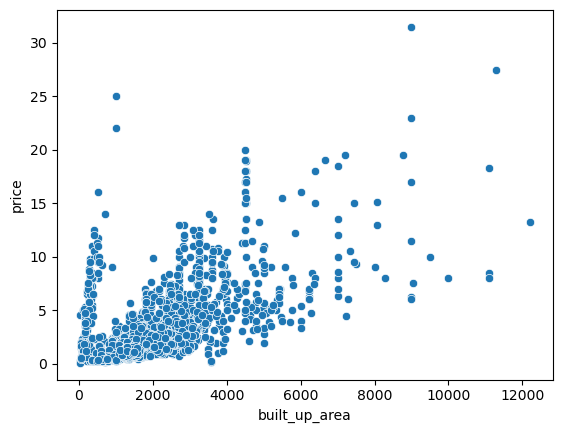

In [215]:
sns.scatterplot(data = df,x='built_up_area',y='price')

In [216]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [217]:
anamoly_df.sample(5)

,price,area,built_up_area
1032,5.15,2727.0,302.0
2350,2.85,1828.0,1654.0
408,2.55,1860.0,1600.0
2670,7.00,2160.0,240.0
3330,4.49,3150.0,389.0


In [218]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [219]:
df.update(anamoly_df)

<AxesSubplot:xlabel='built_up_area', ylabel='price'>

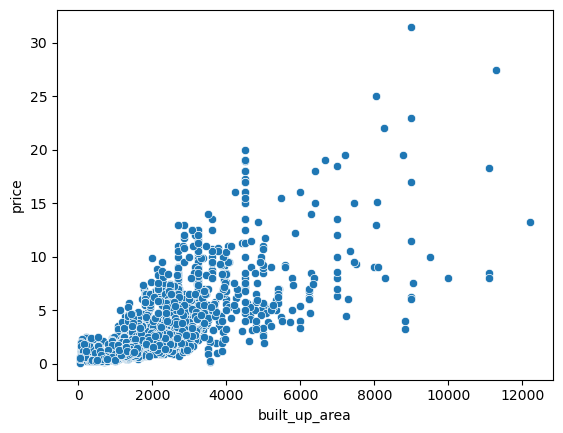

In [220]:
sns.scatterplot(data = df,x='built_up_area',y='price')

In [221]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)

In [222]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,breez global hill view,sohna road,0.32,5776.0,2,2,2,19.0,North,Relatively New,616.0,0,0,0,0,0,0,21
1,flat,signature global synera,sector 81,0.38,9500.0,1,1,2,3.0,South-West,Relatively New,444.0,0,0,0,0,0,1,43
2,flat,emaar mgf emerald floors premier,sector 65,2.35,14242.0,3,3,3,3.0,East,Relatively New,1833.0,1,1,0,0,0,0,124
3,flat,vatika xpressions,sector 88b,1.10,8148.0,2,4,3+,2.0,North-East,Under Construction,1350.0,1,0,0,0,0,1,58
4,flat,bptp terra,sector 37d,1.72,7850.0,3,3,3+,10.0,South-East,Relatively New,1983.0,0,1,0,0,0,1,31


In [223]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             17
facing             1011
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

# floorNum

In [224]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
228,house,independent,sector 2,5.60,17284.0,8,6,3+,NaN,South-West,Moderately Old,3240.0,1,1,1,1,0,1,0
279,house,jacob pura,sector 12,0.35,9722.0,2,1,0,NaN,NaN,Old Property,360.0,0,0,0,0,0,1,0
734,house,emaar mgf marbella,sector 66,9.00,21251.0,4,4,3+,NaN,South-West,Relatively New,5200.0,0,1,1,1,0,0,114
833,house,independent,sector 26,4.60,12198.0,4,4,3+,NaN,NaN,Old Property,3771.0,0,0,0,0,0,1,28
871,house,independent,sector 4,0.65,11111.0,4,2,2,NaN,NaN,Moderately Old,585.0,0,0,0,0,0,1,0
993,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,1,NaN,NaN,Relatively New,3240.0,0,0,0,0,0,1,21
1118,house,independent,sector 24,1.45,2984.0,3,3,1,NaN,NaN,Old Property,540.0,0,0,0,0,0,1,9
1210,house,independent,sector 7,6.50,15046.0,3,2,3+,NaN,NaN,Old Property,4320.0,0,0,0,0,0,1,9
1323,house,independent,sector 25,13.00,45710.0,6,8,3+,NaN,NaN,Relatively New,2844.0,1,1,1,1,0,2,0
1645,house,independent,sector 3,1.50,10288.0,3,3,0,NaN,NaN,Old Property,210.0,0,0,0,0,0,1,0


In [225]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [226]:
df['floorNum'].fillna(2.0,inplace=True)

C:\Users\Prabhu\AppData\Local\Temp\ipykernel_16076\15612474.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['floorNum'].fillna(2.0,inplace=True)


In [227]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1011
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

# facing

<AxesSubplot:ylabel='count'>

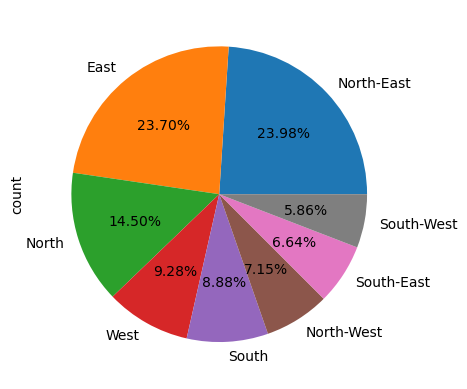

In [228]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [229]:
df.drop(columns=['facing'],inplace=True)

In [231]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3342,flat,bptp terra,sector 37d,1.77,8079.0,4,3,3,15.0,Relatively New,2025.0,1,1,0,1,1,1,49
3252,house,vipul tatvam villa,sector 48,5.75,22184.0,4,4,2,2.0,Moderately Old,2592.0,0,1,0,0,0,1,30
2878,flat,mahindra luminare,sector 59,5.50,18182.0,3,3,1,26.0,Under Construction,2738.0,0,1,0,0,0,1,24
1946,flat,supertech araville,sector 79,0.71,5521.0,2,2,0,9.0,Under Construction,1295.0,0,0,0,0,0,1,0
2343,flat,dlf the primus,sector 82a,2.60,11439.0,4,4,3+,2.0,Relatively New,2273.0,0,0,0,0,1,1,38


In [232]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [233]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3475,flat,NaN,sector 78,0.6,3692.0,2,2,0,2.0,Under Construction,1625.0,0,0,0,0,0,1,0


In [234]:
df.drop(index=[3475],inplace=True)

In [235]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

# agePossession

In [236]:
df['agePossession'].value_counts()

agePossession
Relatively New        1605
New Property           557
Moderately Old         545
Old Property           293
Undefined              291
Under Construction     263
Name: count, dtype: int64

In [237]:
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
5,flat,signature global solera,sector 107,0.25,7862.0,1,1,0,0.0,Undefined,318.0,0,0,0,0,0,1,55
17,house,independent,sector 7,2.25,16892.0,5,3,0,2.0,Undefined,148.0,0,0,0,0,0,1,0
26,flat,m3m heights,sector 65,2.15,15003.0,2,2,3+,28.0,Undefined,1433.0,0,0,0,0,0,1,48
30,flat,spectrum centre,sector 82a,0.62,9538.0,1,1,0,6.0,Undefined,650.0,0,0,0,0,0,1,0
44,house,independent,sector 108,1.34,5000.0,1,1,0,1.0,Undefined,2680.0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3504,house,independent,sector 3,0.90,8929.0,3,1,0,1.0,Undefined,1008.0,0,0,0,0,0,1,0
3507,flat,signature global grand iva,sector 103,0.50,6667.0,2,2,0,10.0,Undefined,750.0,0,0,0,0,0,1,0
3522,flat,ansal housing highland park,sector 103,0.80,5878.0,2,2,2,9.0,Undefined,1361.0,0,0,0,0,0,1,0
3523,flat,ansal api esencia,sector 67,1.20,7407.0,3,3,2,1.0,Undefined,200.0,0,0,0,0,0,1,49


In [238]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [239]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [240]:
df['agePossession'].value_counts()

agePossession
Relatively New        1717
New Property           597
Moderately Old         584
Old Property           326
Under Construction     277
Undefined               53
Name: count, dtype: int64

In [241]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [242]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [243]:
df['agePossession'].value_counts()

agePossession
Relatively New        1726
New Property           598
Moderately Old         591
Old Property           329
Under Construction     277
Undefined               33
Name: count, dtype: int64

In [244]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [245]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [246]:
df['agePossession'].value_counts()

agePossession
Relatively New        1728
Moderately Old         622
New Property           598
Old Property           329
Under Construction     277
Name: count, dtype: int64

In [247]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [248]:
df.to_csv('gurgaon_properties_missing_value_imputation.csv',index=False)

In [249]:
df.shape

(3554, 18)